In [18]:
import yfinance as yf
ticker = 'NVDA'
start_dt = '2022-01-03'

df_yf=yf.download(
        ticker,
#         period = "1y",
        start = start_dt,
        interval = "1d",
        group_by = 'ticker',
        prepost = True,
        threads = True,
        proxy = None
    )
df_yf.columns = [x.lower() for x in df_yf.columns]

[*********************100%***********************]  1 of 1 completed


In [19]:
df_yf['daily_return'] = df_yf['adj close'].pct_change(1)
df_yf

,open,high,low,close,adj close,volume,daily_return
Date,,,,,,,
2022-01-03,298.149994,307.109985,297.850006,301.209991,301.158691,39154700,NaN
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.850098,52715400,-0.027589
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.992981,49806400,-0.057562
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.731995,45418600,0.020794
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.423584,40993900,-0.033040
...,...,...,...,...,...,...,...
2022-05-18,177.050003,181.179993,168.639999,169.380005,169.380005,54516100,-0.068163
2022-05-19,169.369995,176.869995,167.339996,171.240005,171.240005,62131000,0.010981
2022-05-20,173.320007,174.100006,157.550003,166.940002,166.940002,73731800,-0.025111


In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)

<BarContainer object of 99 artists>

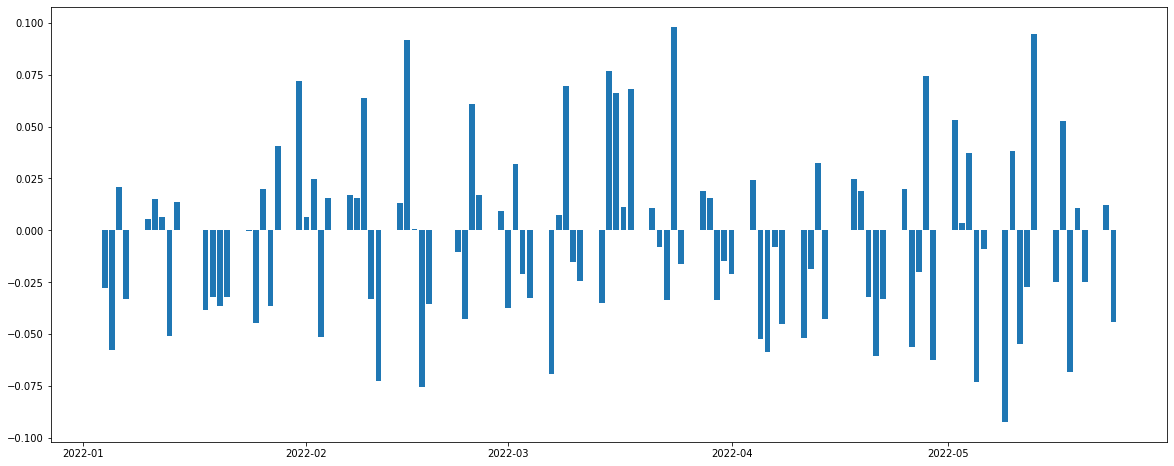

In [21]:
plt.bar(df_yf.index, df_yf['daily_return'])

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
df = df_yf.copy()
fig5 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig5.add_trace(
    go.Bar(x=df.index, y=df.daily_return, name="daily_return"),
    secondary_y=True,
)

fig5.add_trace(
#     go.Scatter(x=result.upload_date, y=result.adjclose_filled, name="adjclose filled"),
#     secondary_y=True
    go.Candlestick(x=df.index,
                open=df.open, high=df.high,
                low=df.low, close=df['adj close'])
)

# Add figure title
fig5.update_layout(
    title_text=f"gf_index and S&P500"
)

# Set x-axis title
fig5.update_xaxes(title_text="time")
fig5.update_layout(xaxis_rangeslider_visible=False)
# Set y-axes titles
fig5.update_yaxes(title_text="gf_index", secondary_y=False)
fig5.update_yaxes(title_text="S%P500", secondary_y=True)

fig5.show()

# fig5.write_html(f"./plots/fgi_sp500_2012.html")